# Project on Supermarket Sales Analysis 

by **Noor Iman Ismail** (imnisml)

This project is to analyze the growth of supermarket with multiple branches in the most populated cities. Using Pandas in Python library for exploratory data analysis (EDA), the data are able to be investigated, analyzed, and cleaned accordingly. 


The objectives of this project are to:
 - Identify the dataset
 - Calculate the supermarket cost of goods sold, gross margin, and gross income
 - Analyze and visualize the supermarket's gross income
 - Search data base for user input

## About the Dataset

Supermarket_Sales dataset is obtained from [Supermarket Sales by Aung Pyae](https://www.kaggle.com/aungpyaeap/supermarket-sales). 

The data dictionary attribute information of the fields (columns):

- **Invoice ID** - Computer generated sales slip invoice identification number.
- **Branch** - Branch of supercenter identified as A, B, and C.
- **City** - Location of supercenters.
- **Customer** - Type of customers, recorded by Members for customer using member card and Normal for without member card.
- **Gender** - Gender type of customer.
- **Product line** - General item categorization groups.
- **Unit price** - Price of each product in Dollar.
- **Quantity** - Number of products purchased by customer.
- **Date** - Date of purchase.
- **Time** - Purchase time.
- **Payment** - Payment used by customer for purchase
- **Rating** - Customer stratification rating on their overall shopping experience (on scale of 1 to 10).

### 1. Dataset identification

#### Import Pandas with an alias of `pd` and NumPy with an alias od `np`

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

#### Read in the `Supermarket_Sales.csv` into a variable called `sales_df`.

In [3]:
sales_df = pd.read_csv('.../data/Supermarket_Sales.csv')

#### The first five rows of the dataset. 

In [4]:
sales_df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,$74.69,7,1/5/2019,13:08,Ewallet,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,$15.28,5,3/8/2019,10:29,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,$46.33,7,3/3/2019,13:23,Credit card,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,$58.22,8,1/27/2019,20:33,Ewallet,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,$86.31,7,2/8/2019,10:37,Ewallet,5.3


#### Set the 'Invoice ID' column as the index of the dataframe

In [5]:
sales_df.set_index('Invoice ID',inplace=True)

In [6]:
sales_df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
Invoice ID,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,$74.69,7,1/5/2019,13:08,Ewallet,9.1
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,$15.28,5,3/8/2019,10:29,Cash,9.6
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,$46.33,7,3/3/2019,13:23,Credit card,7.4
123-19-1176,A,Yangon,Member,Male,Health and beauty,$58.22,8,1/27/2019,20:33,Ewallet,8.4
373-73-7910,A,Yangon,Normal,Male,Sports and travel,$86.31,7,2/8/2019,10:37,Ewallet,5.3


#### Shape of the data set

In [7]:
sales_df.shape

(1000, 11)

In [8]:
print(sales_df.shape[0])
print(sales_df.shape[1])

1000
11


The dataset contains 1000 number of observations and 11 number of columns after the `Invoice ID` has been set as the index of the data frame.

#### Types and info of the data set

Using `.info()` to obtain the Data frame information

In [9]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 750-67-8428 to 849-09-3807
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Branch         1000 non-null   object 
 1   City           1000 non-null   object 
 2   Customer type  1000 non-null   object 
 3   Gender         1000 non-null   object 
 4   Product line   1000 non-null   object 
 5   Unit price     1000 non-null   object 
 6   Quantity       1000 non-null   int64  
 7   Date           1000 non-null   object 
 8   Time           1000 non-null   object 
 9   Payment        1000 non-null   object 
 10  Rating         1000 non-null   float64
dtypes: float64(1), int64(1), object(9)
memory usage: 93.8+ KB


Using the `.select_dtypes()` operation with specification of 'number' to identify data set that is in integer or float type

In [10]:
sales_df.select_dtypes(include='number').head(1)

,Quantity,Rating
Invoice ID,,
750-67-8428,7,9.1


The data types for all columns are `object` (str) except for `Quantity` and `Rating`. Operation `.select_dtypes(include='number')` helps to filter data types `int64` and `float64`.

#### Identifying missing data

Using `isnull()` operation to identify the null values in the data set

In [11]:
sales_df.isnull()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
Invoice ID,,,,,,,,,,,
750-67-8428,False,False,False,False,False,False,False,False,False,False,False
226-31-3081,False,False,False,False,False,False,False,False,False,False,False
631-41-3108,False,False,False,False,False,False,False,False,False,False,False
123-19-1176,False,False,False,False,False,False,False,False,False,False,False
373-73-7910,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
233-67-5758,False,False,False,False,False,False,False,False,False,False,False
303-96-2227,False,False,False,False,False,False,False,False,False,False,False
727-02-1313,False,False,False,False,False,False,False,False,False,False,False


Using `.sum()` operation to sum up the amount of null values in the data set according to the column

In [12]:
sales_df.isnull().sum()

Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64

The dataset has no missing values

#### Identify the number of data type in each column

In [13]:
sales_df.nunique()

Branch             3
City               3
Customer type      2
Gender             2
Product line       6
Unit price       943
Quantity          10
Date              89
Time             506
Payment            3
Rating            61
dtype: int64

`.nunique()` operation shows that there are:
- 3 branches of the supermarket at 3 different cities. 
- 2 types of customers with 2 different genders
- 6 product lines categories
- 3 types of payment used in the supermarket

### 2. Supermarket cost calculation

#### Changing the unit price type

In [14]:
sales_df['Unit price'].dtypes

dtype('O')

Using `.apply()` operation to change the data of `Unit price` by stripping the Dollar sign and changing data type from object to float

In [15]:
sales_df['Unit price'] = sales_df['Unit price'].apply(lambda x: float(x.strip('$')))
sales_df['Unit price'].dtypes

dtype('float64')

#### Creating `class` function for `Gross_Calc`

In [16]:
class Gross_Calc:
    tax = 0.05
    
    def __init__(self, unit_price=0, quantity=0):
        self.unit_price = unit_price
        self.quantity = quantity
        
    def cost_of_goods(self):
        cost_of_goods = self.unit_price * self.quantity
        return round(cost_of_goods,2)
        
    def total_price(self):
        total_tax = 1 + self.tax
        total_price = self.cost_of_goods() * total_tax
        return round(total_price,2)
    
    def gross_margin(self):
        gross_margin = (self.total_price() - self.cost_of_goods())/self.total_price() * 100
        return round(gross_margin,2)
    
    def gross_income(self):
        gross_income = self.total_price() - self.cost_of_goods()
        return round(gross_income,2)

#### Calculating the `Cost of goods sold`, `Total price`, `Gross margin (%)`, and `Gross income`

In [17]:
#assigning variable to the parameters needed for class function
price_unit = sales_df['Unit price']
quantity_unit = sales_df['Quantity']

#assigning calc to the class function
calc = Gross_Calc(price_unit, quantity_unit)

#creating new columns and assigning to the respective define function
sales_df['Cost of goods sold'] = calc.cost_of_goods()
sales_df['Total price'] = calc.total_price()
sales_df['Gross margin (%)'] = calc.gross_margin()
sales_df['Gross income'] = calc.gross_income()


In [18]:
sales_df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,Cost of goods sold,Total price,Gross margin (%),Gross income
Invoice ID,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08,Ewallet,9.1,522.83,548.97,4.76,26.14
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29,Cash,9.6,76.40,80.22,4.76,3.82
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23,Credit card,7.4,324.31,340.53,4.76,16.22
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33,Ewallet,8.4,465.76,489.05,4.76,23.29
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37,Ewallet,5.3,604.17,634.38,4.76,30.21


### 3. Analyzing the calculated data

#### Statistical approach

`Gross income` is the total income the supermarket receives before taxes, expenses, adjustments, exemptions, and deductions.

`.describe()` operation calculates the supermarket `Gross income` from the data set. 

In [19]:
sales_df['Gross income'].describe()

count    1000.000000
mean       15.379580
std        11.708943
min         0.510000
25%         5.927500
50%        12.090000
75%        22.445000
max        49.650000
Name: Gross income, dtype: float64

Plotting a box chart using `.plot()` operation where kind as 'box', color specification in 'purple', figure size is 12 by 12, and y-axis labelled as 'Gross Income'.

<AxesSubplot:ylabel='Gross Income'>

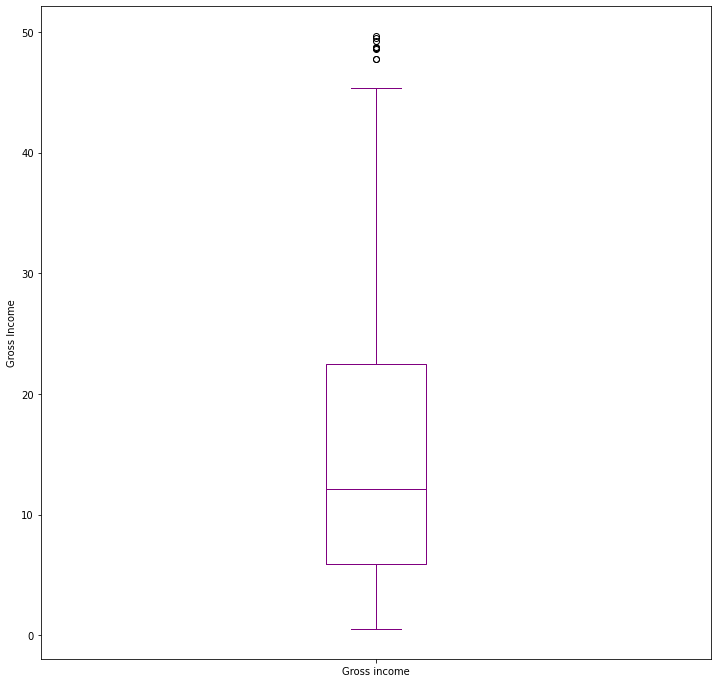

In [20]:
sales_df['Gross income'].plot(kind='box',color='purple', figsize=[12,12], ylabel='Gross Income')

Based on observation:
- The highest gross income the supermarket obtained among the customers is 49.65 Dollar.
- The average gross income obtained per customer is 15.38 Dollar.
- Half of the customers contributed 12.09 Dollar to the gross income.
- The total gross income of this data set is 15379.58 Dollar

#### Relationship between product value, sold item, and gross income

The `.groupby()` operation helps to observe the relationships between the product value, sold item, and gross income obtained. Using `.groupby()` operation to group the data by `Product line`,`max()` operation to find the maximum value of numerical value, and `sort_values()` operation to sort `Unit price` in descending order.

In [37]:
sales_df[['Product line','Unit price','Quantity','Gross income','Cost of goods sold','Total price']].groupby('Product line').max().sort_values('Unit price',ascending=False)

,Unit price,Quantity,Gross income,Cost of goods sold,Total price
Product line,,,,,
Health and beauty,99.96,10,45.25,905.00,950.25
Sports and travel,99.96,10,47.72,954.40,1002.12
Home and lifestyle,99.92,10,48.75,975.00,1023.75
Fashion accessories,99.89,10,49.65,993.00,1042.65
Food and beverages,99.79,10,49.26,985.20,1034.46
Electronic accessories,99.73,10,44.88,897.57,942.45


Based on the observation, the gross income is influence by the total price. The higher the total price paid by the customer, the higher the gross income obtained.

#### Relationship between gross income and location

Using `.groupby()` operation to group the data by `City`, `sum()` operation to sum all numerical values in this case, `Gross income`, and `sort_values()` operation to sort sum values of `Gross income` in descending order.

In [22]:
sales_df[['City','Gross income']].groupby('City').sum().sort_values('Gross income', ascending=False)

,Gross income
City,
Naypyitaw,5265.23
Yangon,5057.18
Mandalay,5057.17


Plotting a bar chart using `.plot()` operation where kind as 'bar', x-axis labelled as 'Cities', y-axis labelled as 'Total Gross Income', specified the color in purple, and adjusting the figure size into 10 by 8.

<AxesSubplot:xlabel='Cities', ylabel='Total Gross Income'>

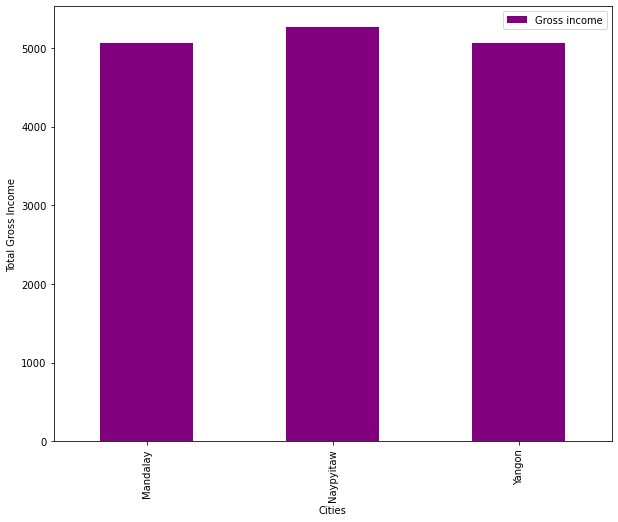

In [23]:
sales_df[['City','Gross income']].groupby('City').sum().plot(kind='bar',xlabel='Cities',ylabel='Total Gross Income',color='purple',figsize=[10,8])

The bar chart above shows that the `Branch` at `Naypyitaw` obtained the highest sum of `Gross income` compared to other cities. The `Gross income` for `City` at `Mandalay` and `Yangon` is almost equal.

#### Relationship between gross income and date

Changing the `Date` into datetime format

In [24]:
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
sales_df.dtypes

Branch                        object
City                          object
Customer type                 object
Gender                        object
Product line                  object
Unit price                   float64
Quantity                       int64
Date                  datetime64[ns]
Time                          object
Payment                       object
Rating                       float64
Cost of goods sold           float64
Total price                  float64
Gross margin (%)             float64
Gross income                 float64
dtype: object

In [25]:
sales_df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,Cost of goods sold,Total price,Gross margin (%),Gross income
Invoice ID,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,2019-01-05,13:08,Ewallet,9.1,522.83,548.97,4.76,26.14
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,2019-03-08,10:29,Cash,9.6,76.40,80.22,4.76,3.82
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,2019-03-03,13:23,Credit card,7.4,324.31,340.53,4.76,16.22
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,2019-01-27,20:33,Ewallet,8.4,465.76,489.05,4.76,23.29
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,2019-02-08,10:37,Ewallet,5.3,604.17,634.38,4.76,30.21


Create a copy of `sales_df` dataframe as `sales_df_date` dataframe containing dataset of `Date` and `Gross income`

In [26]:
sales_df_date = sales_df[['Date','Gross income']]

In [27]:
sales_df_date.head()

,Date,Gross income
Invoice ID,,
750-67-8428,2019-01-05,26.14
226-31-3081,2019-03-08,3.82
631-41-3108,2019-03-03,16.22
123-19-1176,2019-01-27,23.29
373-73-7910,2019-02-08,30.21


Creating `Day` column containing data of 'day of year' using `.dt.dayofyear` operation based on `Date`.

In [28]:
sales_df_date['Day'] = pd.to_datetime(sales_df_date['Date']).dt.dayofyear

<ipython-input-28-0640719f59e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df_date['Day'] = pd.to_datetime(sales_df_date['Date']).dt.dayofyear


Using `sort_values()` operation to sort `Day`

In [29]:
sales_df_date.sort_values('Day')

,Date,Gross income,Day
Invoice ID,,,
770-42-8960,2019-01-01,8.45,1
651-88-7328,2019-01-01,29.58,1
530-90-9855,2019-01-01,19.04,1
182-52-7000,2019-01-01,5.41,1
133-14-7229,2019-01-01,6.29,1
...,...,...,...
743-04-1105,2019-03-30,43.75,89
115-38-7388,2019-03-30,4.07,89
364-34-2972,2019-03-30,14.52,89


Using `.groupby()` operation to group the data by `Day`, `sum()` operation to sum all numerical values in this case, `Gross income`, and `sort_values()` operation to sort sum values of `Gross income` in descending order.

In [30]:
sales_df_date.groupby('Day').sum().sort_values('Gross income',ascending=False)

,Gross income
Day,
68,355.90
38,344.21
73,343.55
46,325.27
61,312.39
...,...
49,71.24
66,68.49
52,66.38


Plotting a line graph based on `Day` and `Gross income`

Text(0.5, 1.0, 'Gross Income per Day')

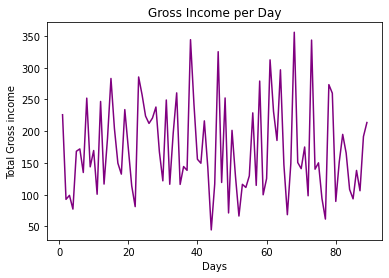

In [31]:
plt.plot(sales_df_date.groupby('Day').sum(), color='purple')
plt.xlabel('Days')
plt.ylabel('Total Gross income')
plt.title('Gross Income per Day')

# Increase default figure and font sizes for easier viewing.
#plt.rcParams['figure.figsize'] = (8, 6)
#plt.rcParams['font.size'] = 14

#x = sales_df_date['Day']
#y = sales_df_date['Gross income']
#plt.plot(x,y)

Based on the plotted line graph, the total gross income obtained by the supermarket daily is fluctuating. The highest `Gross income` daily is 355.9 Dollar at `Day` 68, equivalent to 9th March 2019. The lowest `Gross income` daily is 44.50 Dollar at `Day` 44, equivalent to 13th February 2019.

### 4. User input searching data base

#### Defining functions for user input search database

Creating few define functions to return values for searching database according to the categories.

In [34]:
#user search on dataframe using invoice number
def get_invoice(invoice_num): 
    return sales_df[sales_df.index == invoice_num] #.index because Invoice ID has been replaced as the index

#user search on supermarket location
def get_location(location): 
    location = location.lower()
    location_dict = {'a':'yangon', 'b':'mandalay', 'c':'naypyitaw'}
    i = 0 

    for char in location:
        i+=1

    if i == 1: #get location based on branch
        for branch in location_dict.keys():
            if location == branch:
                location = branch
                break
        if location == branch:
            print(f"The location of {location.upper()} is at city {location_dict[location].capitalize()}")
        else:
            print(f"There is no supermarket with {location.capitalize()} location")

    else: #get location based on city
        print(i)
        for branch,city in location_dict.items():
            if location == city:
                location = city
                break
        if location == city:
                print(f"The supermarket at city: {location.capitalize()} is branch '{branch.upper()}'")
        else:
                print(f"There is no branch supermarket at {location.capitalize()} city")

#user search payment type available
def payment_type(): 
    print(f"There are {sales_df['Payment'].nunique()} types of payment, which are {sales_df['Payment'].unique()}")

Receiving input from user and sending the input to the respective define functions. Using try-excerpt block to ensure that the user input in integer value.

In [35]:
category = ['Invoice No:1', 'Branch Location:2', 'Payment Type:3']
print(f"Here are the categories for user input:\n{category}\n")
    
while True:
    try:
        user_entry = input("Enter your search category number: ")
        if (user_entry == '') or (user_entry == ' '):
            break
        else:
            user_entry = int(user_entry)
            if user_entry == 1:
                invoice_num = input("Enter your invoice number: ")
                print(get_invoice(invoice_num))
            elif user_entry == 2:
                location = input("Enter a branch or City: ")
                get_location(location)
            elif user_entry == 3:
                payment_type()
            else:
                print("No such category number")           
            
                
    except Exception as ex:
            print("Opps! That's an error: {} with exception: {}".format(type(ex).__name__,ex.args)) #built-in variable to print out the type error
            continue

Here are the categories for user input:
['Invoice No:1', 'Branch Location:2', 'Payment Type:3']

Enter your search category number: jok
Opps! That's an error: ValueError with exception: ("invalid literal for int() with base 10: 'jok'",)
Enter your search category number:  
